<a href="https://colab.research.google.com/github/DevinderKaur/2D-graphics/blob/master/VAE_BLSTM_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To print the ex
!pip install ipython-autotime
%load_ext autotime

In [2]:
import warnings
warnings.filterwarnings('ignore')

time: 574 µs (started: 2023-09-18 07:35:30 +00:00)


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

#TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

time: 8.11 s (started: 2023-09-18 07:35:31 +00:00)


In [ ]:
#Check for GPU
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0
time: 2.96 s (started: 2023-09-18 07:09:11 +00:00)


In [ ]:
#Set the seed to reproduce
tf.random.set_seed(1234)

time: 576 µs (started: 2023-09-18 07:09:16 +00:00)


In [ ]:
df=pd.read_csv("/content/AUSGRID_GG_2076.csv", index_col='Date', parse_dates=['Date'])
df.head()
print("shape: ", df.shape)

FileNotFoundError: ignored

time: 345 ms (started: 2023-09-18 07:31:39 +00:00)


In [ ]:
print(df)
print(df.shape)

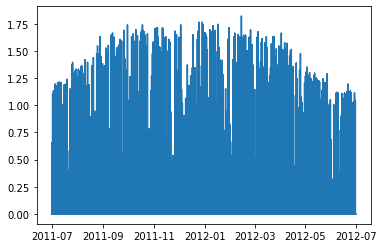

time: 193 ms (started: 2021-03-15 01:53:54 +00:00)


In [ ]:
'''plot the data'''
plt.plot(df['GG'])

In [ ]:
'''pre-process the data, null values'''
#df=df.loc[:,['Date','GG']]
print(df.GG.isna().sum())

0
time: 3.75 ms (started: 2021-03-15 01:53:58 +00:00)


In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

time: 767 µs (started: 2021-03-15 01:53:59 +00:00)


In [ ]:
import sklearn
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['GG']=scaler.fit_transform(df['GG'].values.reshape(-1,1))
    return df
df = normalize_data(df)
df.shape
print(df)

             GG
Date           
2011-07-01  0.0
2011-07-01  0.0
2011-07-01  0.0
2011-07-01  0.0
2011-07-01  0.0
...         ...
2012-06-30  0.0
2012-06-30  0.0
2012-06-30  0.0
2012-06-30  0.0
2012-07-01  0.0

[17568 rows x 1 columns]
time: 14.7 ms (started: 2021-03-15 01:54:00 +00:00)


In [ ]:
'''split the data
train_size=int(len(df)*0.8)
train_data=df.iloc[:train_size]
test_data=df.iloc[train_size:]

time: 2.22 ms (started: 2021-03-12 07:07:26 +00:00)


In [ ]:
'''scale the data
scaler=MinMaxScaler().fit(df)
df=scaler.transform(df)
test_scaled=scaler.transform(test_data)

time: 5.24 ms (started: 2021-03-12 07:07:28 +00:00)


In [ ]:
'''create input datasets
def create_dataset(X,look_back=1):
  XS, YS =[],[]

  for i in range(len(X)-look_back):
    v=X[i:i+look_back]
    XS.append(v)
    YS.append(X[i+look_back])
  return np.array(XS), np.array(YS)

x_train, y_train=create_dataset(train_scaled,48)
x_test, y_test=create_dataset(test_scaled,48)

print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)'''

In [ ]:
'''y_test_original=scaler.inverse_transform(y_test)

time: 1.34 ms (started: 2021-03-12 05:33:48 +00:00)


In [ ]:
def load_data(stock, seq_len):
    x_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        x_train.append(stock.iloc[i - seq_len: i, 0])
        y_train.append(stock.iloc[i, 0])

    # last 3000 days are going to be used in test
    x_test = x_train[14000:]
    y_test = y_train[14000:]

    # first 7000 days are going to be used in training
    x_train = x_train[:3484]
    y_train = y_train[:3484]

    # convert to numpy array
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_test = np.array(x_test)
    y_test = np.array(y_test)

    # 4 reshape data to input into RNN models
    x_train = np.reshape(x_train, (3484, seq_len, 1))

    x_test = np.reshape(x_test, (x_test.shape[0], seq_len, 1))

    return [x_train, y_train, x_test, y_test]

time: 15 ms (started: 2021-03-15 01:54:05 +00:00)


In [ ]:
x_train, y_train, x_test, y_test=load_data(df,96)

time: 1.18 s (started: 2021-03-15 00:13:11 +00:00)


In [ ]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (3484, 96, 1)
y_train: (3484,)
x_test: (835, 96, 1)
y_test: (835,)
time: 3.81 ms (started: 2021-03-15 00:13:12 +00:00)


In [ ]:
input_dim=96
latent_dim=24
future_dim=1

time: 1.84 ms (started: 2021-03-15 00:13:16 +00:00)


In [ ]:
import keras.backend as K

time: 48.4 ms (started: 2021-03-15 00:13:18 +00:00)


In [ ]:
X = K.random_normal(shape=(x_train.shape[0], x_train.shape[1]),
                              mean=0., stddev=0.1)

time: 71.8 ms (started: 2021-03-15 00:13:18 +00:00)


In [ ]:
print(X.shape)
print(X)

In [ ]:
tfk=tf.keras
tfkl=tfk.layers

time: 2.33 ms (started: 2021-03-15 00:13:20 +00:00)


In [ ]:
#encoder network
inputs = keras.Input(shape=(x_train.shape[1],x_train.shape[2]))
#intermediate layer
h = tfkl.Bidirectional(LSTM(latent_dim, activation='relu'))(inputs)
z_mean = tfkl.Dense(latent_dim)(h)
z_log_sigma = tfkl.Dense(latent_dim)(h)
#z = tfkl.Lambda(sampling)([z_mean, z_log_sigma])

time: 269 ms (started: 2021-03-15 00:13:21 +00:00)


In [ ]:
from keras import backend as K
#sampling function
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size=tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = tfkl.Lambda(sampling)([z_mean, z_log_sigma])

time: 22 ms (started: 2021-03-15 00:13:40 +00:00)


In [ ]:
decoder1=tfkl.RepeatVector(x_train.shape[1])(z)
decoder1=tfkl.Bidirectional(LSTM(input_dim,activation='relu',return_sequences=True))(decoder1)
decoder1=tfkl.TimeDistributed(tfkl.Dense(x_train.shape[2]))(decoder1)

time: 241 ms (started: 2021-03-15 00:13:47 +00:00)


In [ ]:
def vae_loss2(inputs, decoder1, z_log_sigma, z_mean):
    """ Calculate loss = reconstruction loss + KL loss for each data """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(inputs, decoder1))
    print(recon)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(z_log_sigma) + K.square(z_mean) - 1. - z_log_sigma)
    return recon + kl

time: 5.37 ms (started: 2021-03-15 00:13:48 +00:00)


In [ ]:
vae=tfk.Model(inputs, decoder1)

time: 14.1 ms (started: 2021-03-15 00:13:49 +00:00)


In [ ]:
vae_loss=vae.add_loss(vae_loss2(inputs, decoder1, z_log_sigma, z_mean))
vae.compile(loss=vae_loss, optimizer='adam')

KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.reduce_sum/Sum:0', description="created by layer 'tf.math.reduce_sum'")
time: 158 ms (started: 2021-03-15 00:13:51 +00:00)


In [ ]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

time: 1.9 ms (started: 2021-03-15 00:13:52 +00:00)


In [ ]:
vae_history=vae.fit(X,X, batch_size=100, epochs=50,validation_split=0.2, callbacks=[early_stop])

In [ ]:
vae.summary()

[[0.23374486]
 [0.15308523]
 [0.12345241]
 ...
 [0.41740151]
 [0.37115902]
 [0.31368536]]


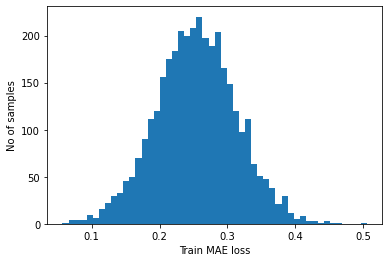

Reconstruction error threshold:  0.5051661686943918
time: 5.33 s (started: 2021-03-15 00:16:26 +00:00)


In [ ]:
##printing the reconstruction loss####
x_train_pred = vae.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
print(train_mae_loss)
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
# LETS DO THE FORECASTING NOW

In [ ]:
import tensorflow_probability as tfp
tfpl=tfp.layers
tfd=tfp.distributions

time: 880 ms (started: 2021-03-15 00:16:38 +00:00)


In [ ]:
forecasting=tfkl.Dense(1)(z)

time: 14.3 ms (started: 2021-03-15 00:16:39 +00:00)


In [ ]:
forecast=tfk.Model(inputs=inputs,outputs=forecasting)

time: 7 ms (started: 2021-03-15 00:16:40 +00:00)


In [ ]:
forecast.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mse')

time: 22.9 ms (started: 2021-03-15 00:16:44 +00:00)


In [ ]:
history_forecasting=forecast.fit(x_train, y_train, epochs=70,callbacks=[early_stop],validation_split=0.2)

In [ ]:
forecast.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 1)]      0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 48)           4992        input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           1176        bidirectional[0][0]              
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           1176        bidirectional[0][0]              
____________________________________________________________________________________________

In [ ]:
w1=np.array(forecast.layers[0].get_weights())
print(w1.shape)

(0,)


In [ ]:
#print(forecast.layers)
w1=np.array(forecast.layers[1].get_weights())
print(w1.shape)
print(w1[0].shape)
print(w1[1].shape)
print(w1[2].shape)
print(w1[3].shape)
print(w1[4].shape)
print(w1[5].shape)

(6,)
(1, 96)
(24, 96)
(96,)
(1, 96)
(24, 96)
(96,)
time: 8.25 ms (started: 2021-03-12 07:02:09 +00:00)


In [ ]:
w1=np.array(forecast.layers[2].get_weights())
print(w1.shape)
print(w1[0].shape)
print(w1[1].shape)

(2,)
(48, 24)
(24,)


In [ ]:
w1=np.array(forecast.layers[3].get_weights())
print(w1.shape)
print(w1[0].shape)
print(w1[1].shape)

(2,)
(48, 24)
(24,)


In [ ]:
w1=np.array(forecast.layers[4].get_weights())
print(w1.shape)

(0,)
time: 1.33 ms (started: 2021-03-11 02:18:38 +00:00)


In [ ]:
pr=forecast(x_test)

time: 102 ms (started: 2021-03-12 02:33:39 +00:00)


In [ ]:
y_pred=forecast.predict(x_test)

time: 609 ms (started: 2021-03-15 00:21:29 +00:00)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
error=mean_squared_error(y_test,y_pred)
print("mse=",error)
rmse=math.sqrt(error)
print("RMSE=",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE=",mae)

Rscore=r2_score(y_test,y_pred)
print("r2_Score=",Rscore)

mse= 0.0059371345362372015
RMSE= 0.07705280355858053
MAE= 0.039145632435467044
r2_Score= 0.929883558703143
time: 11.1 ms (started: 2021-03-15 00:21:31 +00:00)


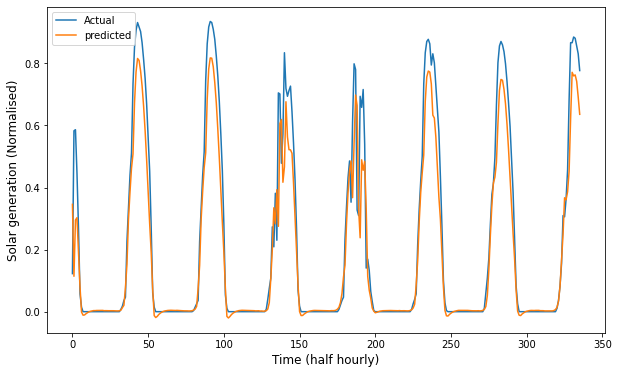

time: 330 ms (started: 2021-03-13 00:14:04 +00:00)


In [ ]:
import numpy as np
#test vs predictions
def plot_future(prediction, model_name, y_test):
  plt.figure(figsize=(10,6))
  plt.plot(y_test[0:336],label='Actual')
  plt.plot(y_mean[0:336],label='predicted')
  #plt.title('Ground truth vs prediction')
  plt.legend(loc='upper left')
  plt.xlabel('Time (half hourly)', fontsize="large")
  plt.ylabel('Solar generation (Normalised)', fontsize="large")
  plt.savefig("vae_forecasting")
plot_future(y_mean,forecast,y_test)

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

import numpy as np

for i in np.arange(0.01, 0.99, 0.01):
  pinball=tfa.losses.pinball_loss(y_test,y_pred,tau=i)
  p=np.mean(pinball)

avg=np.mean(p)
print("avg:",avg)

     |████████████████████████████████| 706kB 6.7MB/s 
avg: 0.14273258
time: 4.81 s (started: 2021-03-15 00:22:43 +00:00)
